## 1. реализовать функцию нормы вектора с выбором между нормами: ||a||inf, ||a||1, ||a||2

In [1]:
import numpy as np
import math
from typing import List, Union
import time
import random

In [2]:
def vector_norm(vector: List[Union[int, float]], norm_type: str = '2') -> float:
    """
    Вычисляет норму вектора.
    
    Параметры:
    vector -- список чисел (вектор)
    norm_type -- тип нормы: 'inf' (максимальная), '1' (L1), '2' (L2/евклидова)
    
    Возвращает:
    Значение нормы вектора
    """
    if not vector:
        raise ValueError("Вектор не может быть пустым")
    
    if norm_type == 'inf':
        return max(abs(x) for x in vector)
    
    elif norm_type == '1':
        return sum(abs(x) for x in vector)
    
    elif norm_type == '2':
        return math.sqrt(sum(x**2 for x in vector))
    
    else:
        raise ValueError(f"Неизвестный тип нормы: {norm_type}. Используйте 'inf', '1' или '2'")

In [3]:
a = [3, -4, 0, 2]
print("Норма вектора a:")
print(f"∞-норма: {vector_norm(a, 'inf')}")
print(f"L1-норма: {vector_norm(a, '1')}")
print(f"L2-норма: {vector_norm(a, '2')}")

Норма вектора a:
∞-норма: 4
L1-норма: 9
L2-норма: 5.385164807134504


## 2. реализовать функцию нормы матрицы с выбором между нормами: ||A||inf, ||A||1, ||A||2

In [4]:
def matrix_norm(matrix: List[List[Union[int, float]]], norm_type: str = 'fro') -> float:
    """
    Вычисляет норму матрицы.
    
    Параметры:
    matrix -- матрица в виде списка списков
    norm_type -- тип нормы: 
        'fro' - норма Фробениуса (по умолчанию)
        '1' - L1-норма (максимальная сумма по столбцам)
        'inf' - ∞-норма (максимальная сумма по строкам)
        'max' - максимальная норма (максимальный по модулю элемент)
    
    Возвращает:
    Значение нормы матрицы
    """
    if not matrix or not matrix[0]:
        raise ValueError("Матрица не может быть пустой")
    
    rows = len(matrix)
    cols = len(matrix[0])
    
    # Проверка, что матрица прямоугольная
    for row in matrix:
        if len(row) != cols:
            raise ValueError("Все строки матрицы должны иметь одинаковую длину")
    
    # Норма Фробениуса - корень из суммы квадратов всех элементов
    if norm_type == 'fro':
        return math.sqrt(sum(x**2 for row in matrix for x in row))
    
    # L1-норма - максимальная сумма по столбцам
    elif norm_type == '1':
        column_sums = []
        for j in range(cols):
            col_sum = sum(abs(matrix[i][j]) for i in range(rows))
            column_sums.append(col_sum)
        return max(column_sums)
    
    # L1-норма - спектральная норма
    elif norm_type == '2':
        def transpose(matrix):
            """Транспонирование матрицы"""
            return [[matrix[j][i] for j in range(len(matrix))] 
                    for i in range(len(matrix[0]))]
        
        def matrix_mult(A, B):
            """Умножение матриц A и B"""
            n = len(A)
            m = len(B[0])
            p = len(B)
            
            result = [[0.0] * m for _ in range(n)]
            
            for i in range(n):
                for j in range(m):
                    for k in range(p):
                        result[i][j] += A[i][k] * B[k][j]
            
            return result
        
        A_T = transpose(A)
        ATA = matrix_mult(A_T, A)
        
        # 2. Находим максимальное собственное значение AᵀA с помощью степенного метода
        def power_method(matrix, max_iter=1000, tolerance=1e-10):
            """
            Степенной метод для нахождения максимального собственного значения
            """
            n = len(matrix)
            
            # Начальное приближение для собственного вектора
            x = [1.0] * n
            
            for iteration in range(max_iter):
                # Умножаем матрицу на вектор: y = A * x
                y = [0.0] * n
                for i in range(n):
                    for j in range(n):
                        y[i] += matrix[i][j] * x[j]
                
                # Нормализуем вектор
                y_norm = math.sqrt(sum(val**2 for val in y))
                if y_norm < tolerance:
                    break
                    
                x_new = [val / y_norm for val in y]
                
                # Проверка сходимости
                diff = math.sqrt(sum((x_new[i] - x[i])**2 for i in range(n)))
                x = x_new
                
                if diff < tolerance:
                    break
            
            # Вычисляем Релеевское отношение: (xT A x) / (xT x)
            Ax = [0.0] * n
            for i in range(n):
                for j in range(n):
                    Ax[i] += matrix[i][j] * x[j]
            
            numerator = sum(x[i] * Ax[i] for i in range(n))
            denominator = sum(x[i] * x[i] for i in range(n))
            
            return numerator / denominator
        
        lambda_max = power_method(ATA)
        return math.sqrt(lambda_max)

    # inf-норма - максимальная сумма по строкам
    elif norm_type == 'inf':
        row_sums = []
        for i in range(rows):
            row_sum = sum(abs(x) for x in matrix[i])
            row_sums.append(row_sum)
        return max(row_sums)
    
    # Максимальная норма - максимальный по модулю элемент
    elif norm_type == 'max':
        return max(max(abs(x) for x in row) for row in matrix)
    
    else:
        raise ValueError(f"Неизвестный тип нормы: {norm_type}. Используйте 'fro', '1', 'inf' или 'max'")

In [5]:
A = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]

print(f"\nНормы матрицы A:")
print(f"Норма Фробениуса: {matrix_norm(A, 'fro'):.4f}")
print(f"L1-норма: {matrix_norm(A, '1'):.4f}")
print(f"∞-норма: {matrix_norm(A, 'inf'):.4f}")
print(f"Спектральная норма (2-норма): {matrix_norm(A, '2'):.4f}")
print(f"Максимальная норма: {matrix_norm(A, 'max'):.4f}")


Нормы матрицы A:
Норма Фробениуса: 16.8819
L1-норма: 18.0000
∞-норма: 24.0000
Спектральная норма (2-норма): 16.8481
Максимальная норма: 9.0000


## 3. Написать функцию решатель СЛАУ

In [6]:
def solve_slau(A: List[List[float]], f: List[float], method: str = 'Gauss', tolerance: float = 1e-10) -> List[float]:
    """
    Решает систему линейных алгебраических уравнений A*x = f
    
    Параметры:
    A -- матрица коэффициентов
    f -- вектор правой части
    method -- метод решения: 
        'Gauss' - метод Гаусса
        'Gauss_pivot' - метод Гаусса с выбором главного элемента
        'orthogonal' - метод ортогонализации
        'tridiagonal' - метод прогонки (для трехдиагональных матриц)
        'LU' - LU разложение
    tolerance -- допустимая погрешность
    
    Возвращает:
    Вектор решения x
    """
    
    def matrix_vector_mult(A: List[List[float]], x: List[float]) -> List[float]:
        """Умножение матрицы на вектор"""
        return [sum(A[i][j] * x[j] for j in range(len(x))) for i in range(len(A))]
    
    def vector_sub(v1: List[float], v2: List[float]) -> List[float]:
        """Вычитание векторов"""
        return [v1[i] - v2[i] for i in range(len(v1))]
    
    def check_residual(A: List[List[float]], x: List[float], f: List[float]) -> float:
        """Проверка невязки ||Ax - f||"""
        Ax = matrix_vector_mult(A, x)
        residual = vector_sub(Ax, f)
        return vector_norm(residual, '2')
    
    def gauss_elimination(A: List[List[float]], f: List[float]) -> List[float]:
        n = len(A)
        Ab = [A[i] + [f[i]] for i in range(n)]
        
        for i in range(n):
            max_row = i
            for k in range(i + 1, n):
                if abs(Ab[k][i]) > abs(Ab[max_row][i]):
                    max_row = k
            Ab[i], Ab[max_row] = Ab[max_row], Ab[i]
            
            for k in range(i + 1, n):
                factor = Ab[k][i] / Ab[i][i]
                for j in range(i, n + 1):
                    Ab[k][j] -= factor * Ab[i][j]
        
        x = [0] * n
        for i in range(n - 1, -1, -1):
            x[i] = Ab[i][n] / Ab[i][i]
            for k in range(i - 1, -1, -1):
                Ab[k][n] -= Ab[k][i] * x[i]
        
        return x
    
    def gauss_pivot(A: List[List[float]], f: List[float]) -> List[float]:
        n = len(A)
        Ab = [A[i] + [f[i]] for i in range(n)]
        
        for i in range(n):
            max_row = i
            for k in range(i + 1, n):
                if abs(Ab[k][i]) > abs(Ab[max_row][i]):
                    max_row = k
            Ab[i], Ab[max_row] = Ab[max_row], Ab[i]
            
            if abs(Ab[i][i]) < 1e-15:
                raise ValueError("Матрица вырождена")
            
            for k in range(i + 1, n):
                factor = Ab[k][i] / Ab[i][i]
                for j in range(i, n + 1):
                    Ab[k][j] -= factor * Ab[i][j]
        
        x = [0] * n
        for i in range(n - 1, -1, -1):
            x[i] = Ab[i][n]
            for j in range(i + 1, n):
                x[i] -= Ab[i][j] * x[j]
            x[i] /= Ab[i][i]
        
        return x
    
    def orthogonalization(A: List[List[float]], f: List[float]) -> List[float]:
        n = len(A)
        Q = [[0.0] * n for _ in range(n)]
        R = [[0.0] * n for _ in range(n)]
        
        for j in range(n):
            v = [A[i][j] for i in range(n)]
            
            for i in range(j):
                R[i][j] = sum(Q[k][i] * A[k][j] for k in range(n))
                for k in range(n):
                    v[k] -= R[i][j] * Q[k][i]
            
            R[j][j] = math.sqrt(sum(v[k]**2 for k in range(n)))
            
            if R[j][j] < 1e-15:
                raise ValueError("Матрица вырождена")
            
            for k in range(n):
                Q[k][j] = v[k] / R[j][j]
        
        QTf = [0.0] * n
        for i in range(n):
            QTf[i] = sum(Q[j][i] * f[j] for j in range(n))
        
        x = [0.0] * n
        for i in range(n - 1, -1, -1):
            x[i] = QTf[i]
            for j in range(i + 1, n):
                x[i] -= R[i][j] * x[j]
            x[i] /= R[i][i]
        
        return x
    
    def tridiagonal_solve(A: List[List[float]], f: List[float]) -> List[float]:
        n = len(A)
        
        for i in range(n):
            for j in range(n):
                if abs(i - j) > 1 and abs(A[i][j]) > 1e-15:
                    raise ValueError("Матрица не трехдиагональная")
        
        a = [0.0] + [A[i][i-1] for i in range(1, n)]
        b = [A[i][i] for i in range(n)]
        c = [A[i][i+1] for i in range(n-1)] + [0.0]
        d = f.copy()
        
        alpha = [0.0] * n
        beta = [0.0] * n
        
        alpha[0] = -c[0] / b[0]
        beta[0] = d[0] / b[0]
        
        for i in range(1, n-1):
            denominator = b[i] + a[i] * alpha[i-1]
            alpha[i] = -c[i] / denominator
            beta[i] = (d[i] - a[i] * beta[i-1]) / denominator
        
        beta[n-1] = (d[n-1] - a[n-1] * beta[n-2]) / (b[n-1] + a[n-1] * alpha[n-2])
        
        x = [0.0] * n
        x[n-1] = beta[n-1]
        
        for i in range(n-2, -1, -1):
            x[i] = alpha[i] * x[i+1] + beta[i]
        
        return x
    
    def lu_decomposition(A: List[List[float]], f: List[float]) -> List[float]:
        n = len(A)
        L = [[0.0] * n for _ in range(n)]
        U = [[0.0] * n for _ in range(n)]
        
        for i in range(n):
            for j in range(i, n):
                U[i][j] = A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))
            
            for j in range(i, n):
                if i == j:
                    L[i][i] = 1.0
                else:
                    L[j][i] = (A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))) / U[i][i]
        
        y = [0.0] * n
        for i in range(n):
            y[i] = f[i] - sum(L[i][j] * y[j] for j in range(i))
        
        x = [0.0] * n
        for i in range(n-1, -1, -1):
            x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i+1, n))) / U[i][i]
        
        return x
    
    if method == 'Gauss':
        x = gauss_elimination(A, f)
    elif method == 'Gauss_pivot':
        x = gauss_pivot(A, f)
    elif method == 'orthogonal':
        x = orthogonalization(A, f)
    elif method == 'tridiagonal':
        x = tridiagonal_solve(A, f)
    elif method == 'LU':
        x = lu_decomposition(A, f)
    else:
        raise ValueError(f"Неизвестный метод: {method}")
    
    residual = check_residual(A, x, f)
    print(f"Невязка ||A*x - f|| = {residual:.2e}")
    
    if residual > tolerance:
        print(f"Внимание: невязка превышает допустимую погрешность!")
    
    return x

In [7]:
print("=" * 60)
print("ТЕСТИРОВАНИЕ РЕШАТЕЛЯ СЛАУ")
print("=" * 60)

print("\nТест 1: Простая система 3x3")
A1 = [
    [2, 1, -1],
    [-3, -1, 2],
    [-2, 1, 2]
]
f1 = [8, -11, -3]

methods = ['Gauss', 'Gauss_pivot', 'orthogonal', 'LU']

for method in methods:
    print(f"\nМетод: {method}")
    try:
        x = solve_slau(A1, f1, method=method)
        print(f"Решение: {[f'{val:.6f}' for val in x]}")
    except Exception as e:
        print(f"Ошибка: {e}")

print("\n" + "=" * 50)
print("Тест 2: Трехдиагональная система")
A2 = [
    [2, 1, 0, 0],
    [1, 3, 1, 0],
    [0, 1, 4, 1],
    [0, 0, 1, 5]
]
f2 = [1, 2, 3, 4]

try:
    x = solve_slau(A2, f2, method='tridiagonal')
    print(f"Решение (прогонка): {[f'{val:.6f}' for val in x]}")
except Exception as e:
    print(f"Ошибка: {e}")

print("\n" + "=" * 50)
print("Тест 3: Плохо обусловленная система")
A3 = [
    [1, 1],
    [1, 1.0001]
]
f3 = [2, 2.0001]

for method in ['Gauss_pivot', 'orthogonal']:
    print(f"\nМетод: {method}")
    try:
        x = solve_slau(A3, f3, method=method)
        print(f"Решение: {[f'{val:.6f}' for val in x]}")
    except Exception as e:
        print(f"Ошибка: {e}")

print("\n" + "=" * 50)
print("Тест 4: Проверка точности")
import random

n = 4
A4 = [[random.gauss(0, 1) for _ in range(n)] for _ in range(n)]
x_true = [random.gauss(0, 1) for _ in range(n)]
f4 = [sum(A4[i][j] * x_true[j] for j in range(n)) for i in range(n)]

print(f"Истинное решение: {[f'{val:.6f}' for val in x_true]}")

for method in ['Gauss_pivot', 'LU']:
    print(f"\nМетод: {method}")
    x_calc = solve_slau(A4, f4, method=method, tolerance=1e-8)
    print(f"Вычисленное: {[f'{val:.6f}' for val in x_calc]}")
    
    error = math.sqrt(sum((x_true[i] - x_calc[i])**2 for i in range(n)))
    print(f"Ошибка: {error:.2e}")

ТЕСТИРОВАНИЕ РЕШАТЕЛЯ СЛАУ

Тест 1: Простая система 3x3

Метод: Gauss
Невязка ||A*x - f|| = 8.88e-16
Решение: ['2.000000', '3.000000', '-1.000000']

Метод: Gauss_pivot
Невязка ||A*x - f|| = 8.88e-16
Решение: ['2.000000', '3.000000', '-1.000000']

Метод: orthogonal
Невязка ||A*x - f|| = 7.94e-15
Решение: ['2.000000', '3.000000', '-1.000000']

Метод: LU
Невязка ||A*x - f|| = 0.00e+00
Решение: ['2.000000', '3.000000', '-1.000000']

Тест 2: Трехдиагональная система
Невязка ||A*x - f|| = 0.00e+00
Решение (прогонка): ['0.294118', '0.411765', '0.470588', '0.705882']

Тест 3: Плохо обусловленная система

Метод: Gauss_pivot
Невязка ||A*x - f|| = 0.00e+00
Решение: ['1.000000', '1.000000']

Метод: orthogonal
Невязка ||A*x - f|| = 6.28e-12
Решение: ['1.000000', '1.000000']

Тест 4: Проверка точности
Истинное решение: ['-1.388990', '-1.710273', '-0.709396', '1.625052']

Метод: Gauss_pivot
Невязка ||A*x - f|| = 1.09e-15
Вычисленное: ['-1.388990', '-1.710273', '-0.709396', '1.625052']
Ошибка: 1.04e-1

### 4. С помощью библиотеки random создать наборы матриц (NxN) N экв 3 * 10^4 и сравнить скорость работы решателя по логарифму

In [8]:
def generate_random_matrix(n: int) -> List[List[float]]:
    """Генерация случайной матрицы NxN с диагональным преобладанием для устойчивости"""
    A = [[0.0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            A[i][j] = random.uniform(-1, 1)
        A[i][i] = n + random.uniform(0, 1)
    return A

In [9]:
def generate_random_vector(n: int) -> List[float]:
    """Генерация случайного вектора длины N"""
    return [random.uniform(-10, 10) for _ in range(n)]

In [10]:
def benchmark_solver():
    """Сравнение скорости работы решателя для разных размеров матриц"""
    
    sizes = [25, 50, 75, 100, 150, 200, 250, 500]
    
    methods = ['Gauss', 'Gauss_pivot', 'orthogonal', 'LU']
    
    print("=" * 70)
    print("БЕНЧМАРК РЕШАТЕЛЯ СЛАУ")
    print("=" * 70)
    print(f"{'Размер':<8} {'Метод':<12} {'Время (с)':<12} {'log10(время)':<12}")
    print("-" * 70)
    
    results = []
    
    for n in sizes:
        print(f"\nРазмер матрицы: {n}x{n}")
        
        A = generate_random_matrix(n)
        f = generate_random_vector(n)
        
        for method in methods:
            try:
                start_time = time.time()
                x = solve_slau(A, f, method=method, tolerance=1e-6)
                end_time = time.time()
                
                execution_time = end_time - start_time
                log_time = math.log10(execution_time) if execution_time > 0 else -float('inf')
                
                results.append({
                    'size': n,
                    'method': method,
                    'time': execution_time,
                    'log_time': log_time
                })
                
                print(f"{n:<8} {method:<12} {execution_time:<12.6f} {log_time:<12.6f}")
                
            except Exception as e:
                print(f"{n:<8} {method:<12} {'Ошибка':<12} {str(e)[:20]}...")
    
    return results


In [11]:
def analyze_complexity(results: List[dict]):
    """Анализ сложности методов"""
    print("\n" + "=" * 70)
    print("АНАЛИЗ СЛОЖНОСТИ")
    print("=" * 70)
    
    methods = set(r['method'] for r in results)
    
    for method in methods:
        method_results = [r for r in results if r['method'] == method]
        
        if len(method_results) < 2:
            continue
            
        print(f"\nМетод: {method}")
        print(f"{'Размер':<8} {'log10(N)':<12} {'log10(время)':<12}")
        print("-" * 40)
        
        for result in method_results:
            n = result['size']
            log_n = math.log10(n)
            log_time = result['log_time']
            print(f"{n:<8} {log_n:<12.6f} {log_time:<12.6f}")
        
        if len(method_results) >= 2:
            last_two = method_results[-2:]
            n1, t1 = last_two[0]['size'], last_two[0]['time']
            n2, t2 = last_two[1]['size'], last_two[1]['time']
            
            if t1 > 0 and t2 > 0 and n1 > 0 and n2 > 0:
                p = math.log(t2 / t1) / math.log(n2 / n1)
                print(f"Оценка сложности: O(n^{p:.2f})")


In [12]:
def plot_complexity(results: List[dict]):
    """Визуализация результатов (если установлен matplotlib)"""
    try:
        import matplotlib.pyplot as plt
        
        methods = set(r['method'] for r in results)
        
        plt.figure(figsize=(12, 8))
        
        for method in methods:
            method_results = [r for r in results if r['method'] == method]
            sizes = [r['size']**2 for r in method_results]
            times = [r['time'] for r in method_results]
            
            plt.plot(sizes, times, 'o-', label=method, linewidth=2, markersize=8)
        
        plt.xlabel('Размер матрицы N')
        plt.ylabel('Время выполнения (с)')
        plt.title('Сравнение скорости методов решения СЛАУ')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.yscale('log')
        plt.xscale('log')
        plt.show()
        
    except ImportError:
        print("\nMatplotlib не установлен. Пропускаем визуализацию.")


БЕНЧМАРК РЕШАТЕЛЯ СЛАУ
Размер   Метод        Время (с)    log10(время)
----------------------------------------------------------------------

Размер матрицы: 25x25
Невязка ||A*x - f|| = 8.07e-15
25       Gauss        0.001000     -3.000031   
Невязка ||A*x - f|| = 8.08e-15
25       Gauss_pivot  0.001000     -2.999928   
Невязка ||A*x - f|| = 1.01e-14
25       orthogonal   0.001512     -2.820365   
Невязка ||A*x - f|| = 5.91e-15
25       LU           0.000998     -3.000653   

Размер матрицы: 50x50
Невязка ||A*x - f|| = 1.84e-14
50       Gauss        0.003999     -2.398049   
Невязка ||A*x - f|| = 1.80e-14
50       Gauss_pivot  0.003507     -2.455106   
Невязка ||A*x - f|| = 2.34e-14
50       orthogonal   0.010507     -1.978527   
Невязка ||A*x - f|| = 1.10e-14
50       LU           0.004008     -2.397092   

Размер матрицы: 75x75
Невязка ||A*x - f|| = 3.45e-14
75       Gauss        0.011510     -1.938920   
Невязка ||A*x - f|| = 3.46e-14
75       Gauss_pivot  0.010512     -1.978320   

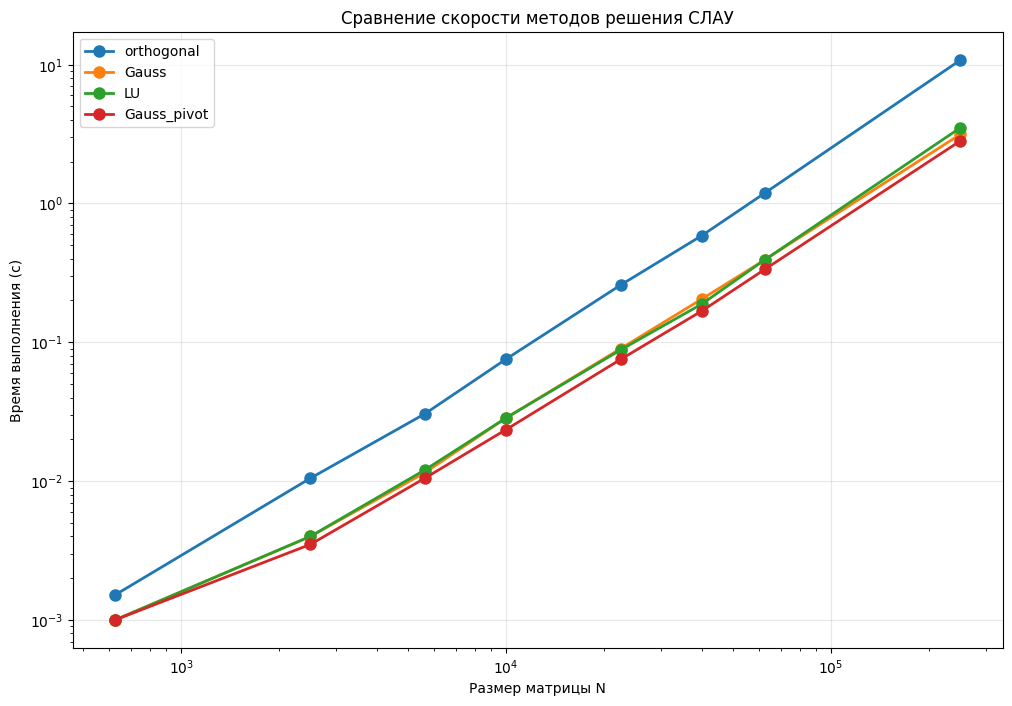

In [13]:
results = benchmark_solver()

analyze_complexity(results)

plot_complexity(results)

## 5. Метод простой итерациии Якоби, Зейделя, минимальных невязок

In [ ]:
# Вспомогательные функции для работы с векторами и матрицами
def matrix_vector_mult(A: List[List[float]], x: List[float]) -> List[float]:
    """Умножение матрицы на вектор"""
    n = len(A)
    return [sum(A[i][j] * x[j] for j in range(n)) for i in range(n)]

def vector_sub(v1: List[float], v2: List[float]) -> List[float]:
    """Вычитание векторов"""
    return [v1[i] - v2[i] for i in range(len(v1))]

def vector_add(v1: List[float], v2: List[float]) -> List[float]:
    """Сложение векторов"""
    return [v1[i] + v2[i] for i in range(len(v1))]

def scalar_mult(v: List[float], scalar: float) -> List[float]:
    """Умножение вектора на скаляр"""
    return [scalar * x for x in v]

def dot_product(v1: List[float], v2: List[float]) -> float:
    """Скалярное произведение векторов"""
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def check_diagonal_dominance(A: List[List[float]]) -> bool:
    """Проверка диагонального преобладания"""
    n = len(A)
    for i in range(n):
        diagonal = abs(A[i][i])
        row_sum = sum(abs(A[i][j]) for j in range(n) if j != i)
        if diagonal <= row_sum:
            return False
    return True

In [15]:
def jacobi_method(A: List[List[float]], f: List[float], x0: List[float], 
                  max_iter: int = 1000, tolerance: float = 1e-10):
    """Метод Якоби"""
    n = len(A)
    x = x0.copy()
    iterations = 0
    
    for k in range(max_iter):
        x_new = [0.0] * n
        
        for i in range(n):
            sigma = 0.0
            for j in range(n):
                if j != i:
                    sigma += A[i][j] * x[j]
            x_new[i] = (f[i] - sigma) / A[i][i]
        
        residual = vector_sub(matrix_vector_mult(A, x_new), f)
        residual_norm = vector_norm(residual)
        
        x = x_new
        iterations = k + 1
        
        if residual_norm < tolerance:
            break
    
    return x, iterations

In [16]:
def seidel_method(A: List[List[float]], f: List[float], x0: List[float],
                  max_iter: int = 1000, tolerance: float = 1e-10):
    """Метод Зейделя (Гаусса-Зейделя)"""
    n = len(A)
    x = x0.copy()
    iterations = 0
    
    for k in range(max_iter):
        x_new = x.copy()
        
        for i in range(n):
            sigma1 = 0.0
            sigma2 = 0.0
            
            for j in range(i):
                sigma1 += A[i][j] * x_new[j]
            for j in range(i + 1, n):
                sigma2 += A[i][j] * x[j]
            
            x_new[i] = (f[i] - sigma1 - sigma2) / A[i][i]
        
        # Проверка сходимости
        residual = vector_sub(matrix_vector_mult(A, x_new), f)
        residual_norm = vector_norm(residual)
        
        x = x_new
        iterations = k + 1
        
        if residual_norm < tolerance:
            break
    
    return x, iterations

In [17]:
def minimal_residual_method(A: List[List[float]], f: List[float], x0: List[float],
                            max_iter: int = 1000, tolerance: float = 1e-10):
    """Метод минимальных невязок"""
    x = x0.copy()
    iterations = 0
    
    for k in range(max_iter):
        r = vector_sub(f, matrix_vector_mult(A, x))
        r_norm = vector_norm(r)
        
        if r_norm < tolerance:
            break
        
        Ar = matrix_vector_mult(A, r)
        
        numerator = dot_product(r, r)
        denominator = dot_product(r, Ar)
        
        if abs(denominator) < 1e-15:
            break
            
        tau = numerator / denominator
        
        x = vector_add(x, scalar_mult(r, tau))
        iterations = k + 1
    
    return x, iterations

In [18]:
# Основная функция итерационных методов
def iterative_methods(A: List[List[float]], f: List[float], method: str = 'Jacobi', 
                     max_iter: int = 1000, tolerance: float = 1e-10) -> List[float]:
    """
    Итерационные методы решения СЛАУ
    
    Параметры:
    A -- матрица коэффициентов
    f -- вектор правой части
    method -- метод решения: 
        'Jacobi' - метод Якоби
        'Seidel' - метод Зейделя
        'Minimal_residual' - метод минимальных невязок
    max_iter -- максимальное число итераций
    tolerance -- допустимая погрешность
    
    Возвращает:
    Вектор решения x
    """
    
    n = len(A)
    
    # Проверка сходимости
    if not check_diagonal_dominance(A):
        print("Предупреждение: матрица не имеет диагонального преобладания, сходимость не гарантирована")
    
    # Начальное приближение (нулевой вектор)
    x0 = [0.0] * n
    
    # Выбор метода
    start_time = time.time()
    
    if method == 'Jacobi':
        x, iterations = jacobi_method(A, f, x0, max_iter, tolerance)
    elif method == 'Seidel':
        x, iterations = seidel_method(A, f, x0, max_iter, tolerance)
    elif method == 'Minimal_residual':
        x, iterations = minimal_residual_method(A, f, x0, max_iter, tolerance)
    else:
        raise ValueError(f"Неизвестный метод: {method}")
    
    execution_time = time.time() - start_time
    
    # Проверка невязки
    residual = vector_sub(matrix_vector_mult(A, x), f)
    residual_norm = vector_norm(residual)
    
    print(f"Метод: {method}")
    print(f"Итераций: {iterations}")
    print(f"Время: {execution_time:.6f} сек")
    print(f"Невязка: {residual_norm:.2e}")
    
    if residual_norm > tolerance:
        print("Внимание: невязка превышает допустимую погрешность!")
    
    return x

In [ ]:
# Функции для тестирования и сравнения
def compare_iterative_methods():
    """Сравнение итерационных методов"""
    
    # Тест 1: Простая система с диагональным преобладанием
    print("=" * 70)
    print("ТЕСТ 1: СИСТЕМА С ДИАГОНАЛЬНЫМ ПРЕОБЛАДАНИЕМ")
    print("=" * 70)
    
    A1 = [
        [10, 1, 1],
        [1, 10, 1],
        [1, 1, 10]
    ]
    f1 = [12, 12, 12]
    
    methods = ['Jacobi', 'Seidel', 'Minimal_residual']
    
    for method in methods:
        print(f"\n{method}:")
        x = iterative_methods(A1, f1, method=method, max_iter=1000, tolerance=1e-10)
        print(f"Решение: {[f'{val:.8f}' for val in x]}")
    
    # Тест 2: Большая разреженная система
    print("\n" + "=" * 70)
    print("ТЕСТ 2: БОЛЬШАЯ РАЗРЕЖЕННАЯ СИСТЕМА (20x20)")
    print("=" * 70)
    
    n = 20
    A2 = [[0.0] * n for _ in range(n)]
    f2 = [0.0] * n
    
    # Создание трехдиагональной матрицы с диагональным преобладанием
    for i in range(n):
        if i > 0:
            A2[i][i-1] = 1.0
        A2[i][i] = 3.0
        if i < n-1:
            A2[i][i+1] = 1.0
        f2[i] = 1.0  # Единичная правая часть
    
    for method in methods:
        print(f"\n{method}:")
        x = iterative_methods(A2, f2, method=method, max_iter=1000, tolerance=1e-8)
        # Выводим только первые 5 элементов для краткости
        print(f"Первые 5 элементов: {[f'{val:.6f}' for val in x[:5]]}")
    
    # Тест 3: Сравнение скорости сходимости
    print("\n" + "=" * 70)
    print("ТЕСТ 3: СРАВНЕНИЕ СКОРОСТИ СХОДИМОСТИ")
    print("=" * 70)
    
    A3 = [
        [4, 1, 0],
        [1, 4, 1],
        [0, 1, 4]
    ]
    f3 = [1, 2, 3]
    
    print("Сравнение числа итераций для достижения точности 1e-8:")
    for method in methods:
        x = iterative_methods(A3, f3, method=method, max_iter=1000, tolerance=1e-8)

In [ ]:
# Сравнение методов на различных тестовых случаях
compare_iterative_methods()

ТЕСТ 1: СИСТЕМА С ДИАГОНАЛЬНЫМ ПРЕОБЛАДАНИЕМ

Jacobi:
Метод: Jacobi
Итераций: 17
Время: 0.000000 сек
Невязка: 2.72e-11
Решение: ['1.00000000', '1.00000000', '1.00000000']

Seidel:
Метод: Seidel
Итераций: 8
Время: 0.000000 сек
Невязка: 7.70e-11
Решение: ['1.00000000', '1.00000000', '1.00000000']

Minimal_residual:
Метод: Minimal_residual
Итераций: 1
Время: 0.000000 сек
Невязка: 0.00e+00
Решение: ['1.00000000', '1.00000000', '1.00000000']

ТЕСТ 2: БОЛЬШАЯ РАЗРЕЖЕННАЯ СИСТЕМА (20x20)

Jacobi:
Метод: Jacobi
Итераций: 48
Время: 0.002511 сек
Невязка: 8.48e-09
Первые 5 элементов: ['0.276393', '0.170820', '0.211146', '0.195743', '0.201626']

Seidel:
Метод: Seidel
Итераций: 23
Время: 0.002002 сек
Невязка: 5.67e-09
Первые 5 элементов: ['0.276393', '0.170820', '0.211146', '0.195743', '0.201626']

Minimal_residual:
Метод: Minimal_residual
Итераций: 35
Время: 0.001999 сек
Невязка: 1.52e-08
Внимание: невязка превышает допустимую погрешность!
Первые 5 элементов: ['0.276393', '0.170820', '0.211146', '